In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [134]:
rng = np.random.RandomState(45)

In [2]:
file_path = r'C:\Users\krist\Downloads\ece\8ο\Αναγνωριση προτυπων\Ergastiriakes Askisis\PatRec\DATA\liverdisorder.data'
liver = np.loadtxt(file_path)

In [3]:
healthy_indices = (liver[:,6]==1)
healthy = liver[healthy_indices]
sick = liver[~healthy_indices]

In [4]:
def perceptron(class1, class2, lr):
    w = np.random.normal(0,1,class1.shape[1])
    
    for i in range(100):

        for pattern in class1:
            y = np.dot(pattern[:-1],w[:-1]) + w[-1]
            if y>=0:
                None
            elif y<0:
                w += lr*np.append(pattern[:-1],1)
                
        for pattern in class2:
            y = np.dot(pattern[:-1],w[:-1]) + w[-1]
            if y<0:
                None
            elif y>=0:
                w -= lr*np.append(pattern[:-1],1)
    return w

In [135]:
def perceptron2(data, lr):
    w = rng.normal(0,1,data.shape[1])
    
    healthy_indices = (data[:,6]==1)
    healthy = data[healthy_indices]
    sick = data[~healthy_indices]
    error = []
    
    for i in range(100):
        rng.shuffle(data)
        for pattern in data:
            y = np.dot(pattern[:-1],w[:-1]) + w[-1]
            if y>=0 and pattern[-1]==1:
                None
            elif y<0 and pattern[-1]==1:
                w += lr*np.append(pattern[:-1],1)
            elif y<0 and pattern[-1]==2:
                None
            elif y>=0 and pattern[-1]==2:
                w -= lr*np.append(pattern[:-1],1)    
                
        
            error.append(evaluate(w, healthy, sick))
    plt.plot(error)
    
    return w

In [389]:
def perceptron3(data, lr, evaluation=True, rng = np.random):
    '''
    data:array containing training data
    lr:learning rate
    evaluation:True if we want to evaluate classifier during training
    rng:random state for reproducibility
    '''
    
    #split data for evaluation
    healthy_indices = (data[:,6]==1)
    healthy = data[healthy_indices]
    sick = data[~healthy_indices]
    
    w = rng.normal(0,1,data.shape[1])#initialize w
    error = [] #will contain
    for i in range(100000): #for 100000
        
        pattern = data[rng.randint(data.shape[0])] #grab a random pattern from data
        y = np.dot(pattern[:-1],w[:-1]) + w[-1] #calculate (w^T)x and according to its value and class update w
        if y>=0 and pattern[-1]==1:
            None
        elif y<0 and pattern[-1]==1:
            w += lr*np.append(pattern[:-1],1)
        elif y<0 and pattern[-1]==2:
            None
        elif y>=0 and pattern[-1]==2:
            w -= lr*np.append(pattern[:-1],1)  
        
        if evaluation: #if we want to evaluate the classifier in each epoch
            error.append(evaluate(w, healthy, sick)) #use evaluation function and classes array to get error rate

        #if np.mean(error[:-5])<0.40:
         #   return w,error

    return w, error #return error list and coefficients

In [393]:
def evaluate(w, class1, class2):
    #data = np.concatenate([class1[:,:-1], -class2[:,:-1]])
    y1 = class1[:,:-1]@w[:-1] + w[-1]
    y2 = class2[:,:-1]@w[:-1] + w[-1]
    return (np.sum(y1<0)+np.sum(y2>0))/(len(class1) + len(class2))

In [10]:
def mean_error(w,class1,class2,iterrations):
    return np.mean([evaluate(w, class1, class2) for i in range(iterrations)])

In [244]:
w = perceptron(healthy, sick, 0.01)
print(evaluate(w,healthy,sick))

mean_error=0
for i in range(1000):
    w = perceptron(healthy, sick, 0.01)
    mean_error += evaluate(w,healthy,sick)
print(mean_error/1000)

0.42028985507246375
0.4203043478260795


In [29]:
w2 = perceptron2(liver,0.8)
print(evaluate(w2,healthy,sick))

mean_error=0
for i in range(100):
    w2 = perceptron2(liver, 0.1)
    mean_error += evaluate(w2,healthy,sick)
print(mean_error/100)

0.391304347826087
0.4025507246376812


In [397]:
#w3 = perceptron3(liver,0.8)
#print(evaluate(w3,healthy,sick))

errs = {} #will store coeeficients and their respective errors
for i in range(100):
    w, error= perceptron3(liver,1e-5,False) #no random seed, lr = 1e-5
    e = evaluate(w,healthy,sick) #use coefficients to calculate error
    errs.update({e:w}) #store coefficients and error to dict
#print(mean_error/100)

In [404]:
np.mean(list(errs.keys()))

0.4013567684242985

In [407]:
min(errs)

0.3101449275362319

In [406]:
print(errs[min(errs)])

[ 0.05104763  0.07476187  0.46950895 -1.0120474  -0.0553057   0.24406173
  0.75729391]


In [306]:
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

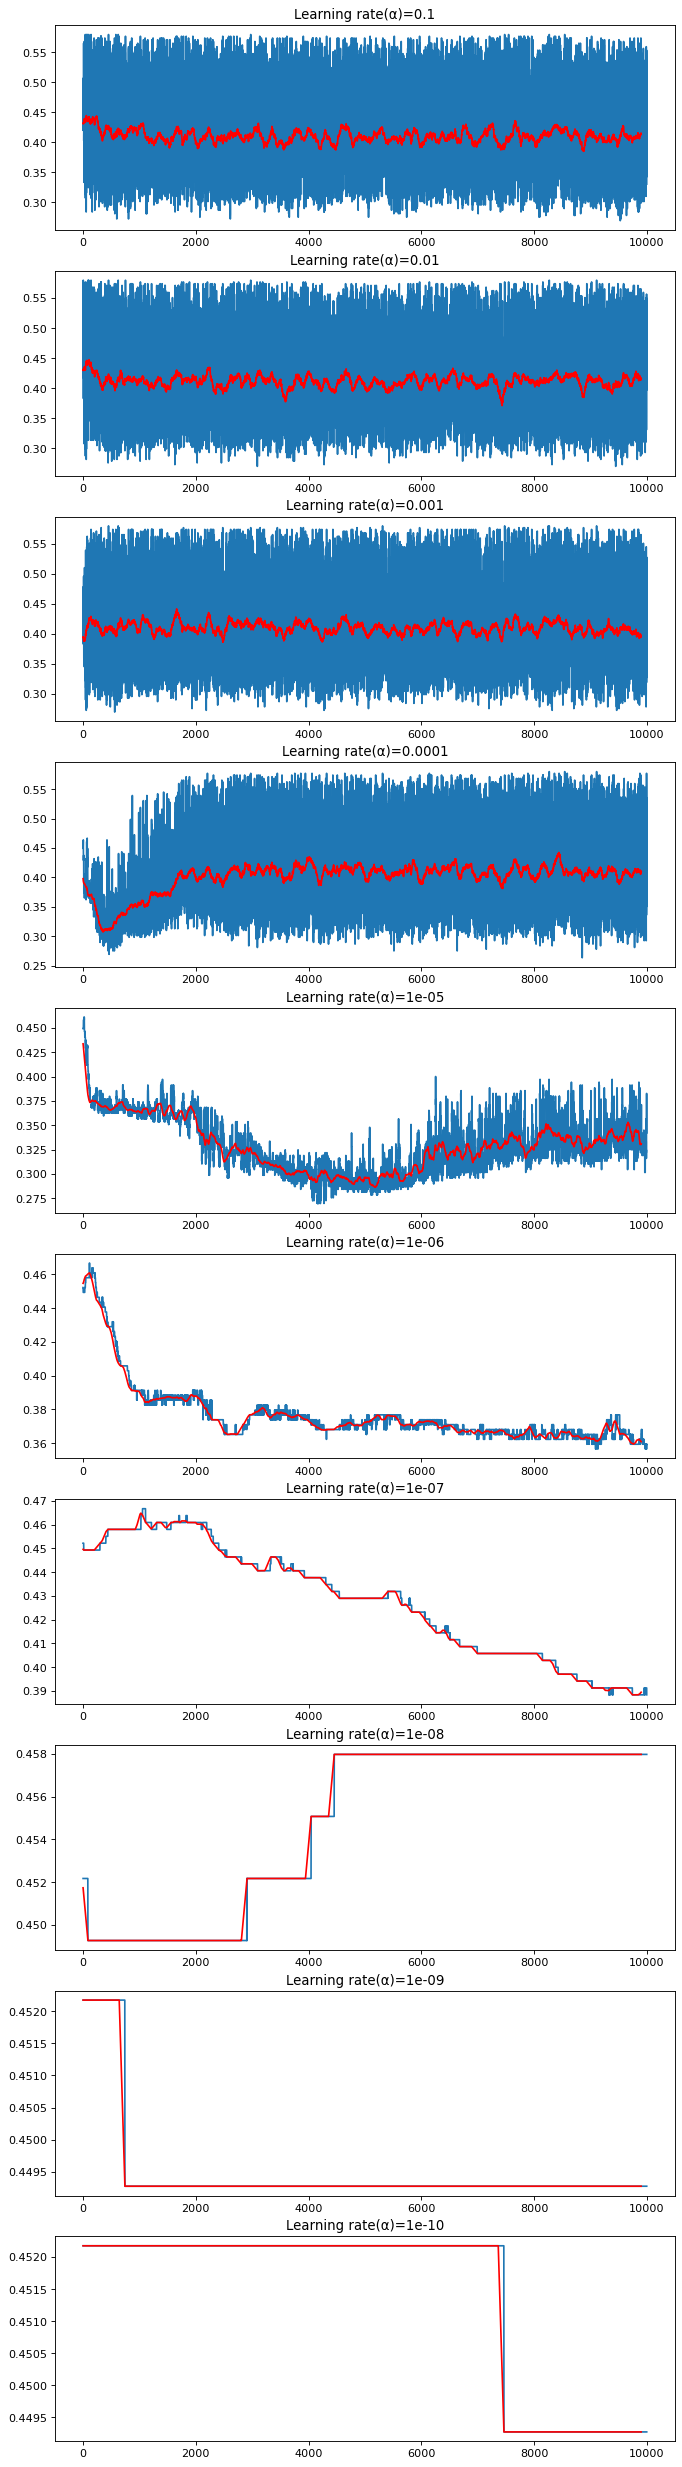

In [315]:
plt.figure(figsize=(10, 40), dpi=80)
for i in range(1,11):
    w2, error = perceptron3(liver,10**(-i),True, np.random.RandomState(69))
    plt.subplot(10, 1, i)
    plt.title(f'Learning rate(α)={np.round(10**(-i),11)}')
    plt.plot(error)
    plt.plot(moving_average(error,100), color='r')

#plt.plot(error)

In [296]:
a = [j*10**(-i) for i in range(10,1,-1) for j in range(1,10)] #learning rates we will use
errors = [] #list that will store errors for each lr
for i in a: #for each lr call perceptron and calculate the classification error
    w, error = perceptron3(liver,i,False,np.random.RandomState(69))
    errors.append(evaluate(w,healthy,sick))

([<matplotlib.axis.XTick at 0x1cdf3f47940>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  

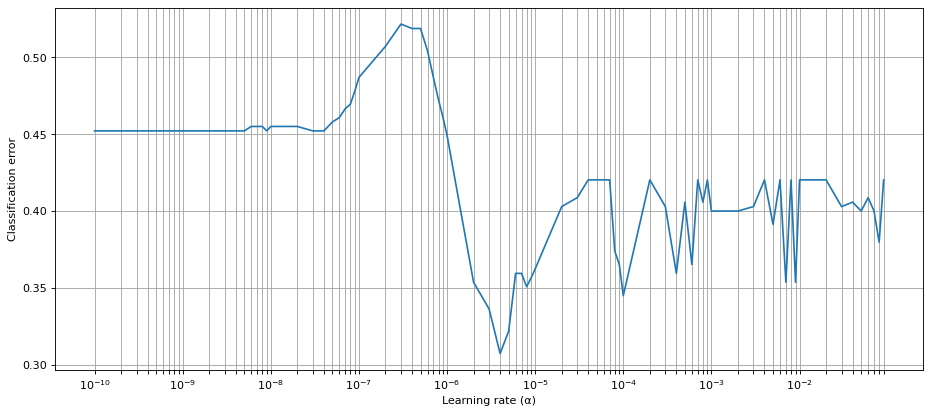

In [278]:
plt.figure(figsize=(14, 6), dpi=80)
plt.semilogx(a,errors)
plt.xlabel("Learning rate (α)")
plt.ylabel("Classification error")
plt.grid(True, which="major", ls="-", color='0.65')
plt.xticks(a)


([<matplotlib.axis.XTick at 0x1cdf3d56550>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  

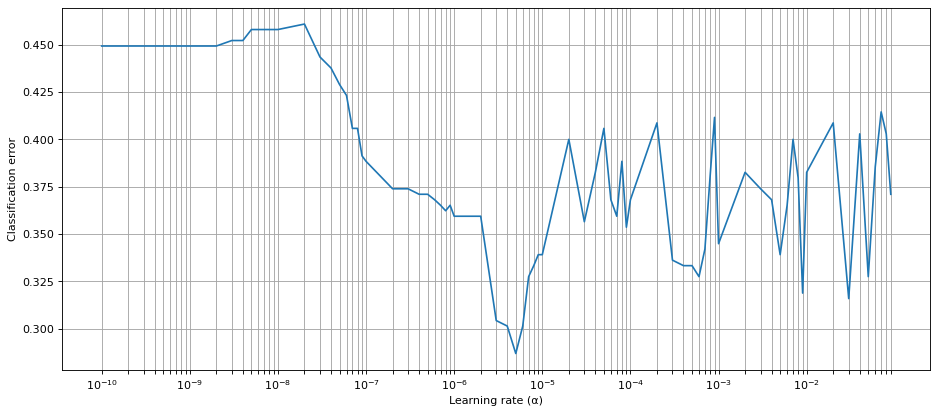

In [297]:
plt.figure(figsize=(14, 6), dpi=80)
plt.semilogx(a,errors)
plt.xlabel("Learning rate (α)")
plt.ylabel("Classification error")
plt.grid(True, which="major", ls="-", color='0.65')
plt.xticks(a)
#ax.set_xscale(1, 'log')

In [386]:
epochs = []
for i in [10**(-j) for j in range(1,10)]:
    w, error = perceptron3(liver,i,True,np.random.RandomState(69))
    epochs.append(len(error))

[100000]
[100000, 100000]
[100000, 100000, 8]
[100000, 100000, 8, 394]
[100000, 100000, 8, 394, 2444]
[100000, 100000, 8, 394, 2444, 25900]
[100000, 100000, 8, 394, 2444, 25900, 100000]
[100000, 100000, 8, 394, 2444, 25900, 100000, 100000]
[100000, 100000, 8, 394, 2444, 25900, 100000, 100000, 100000]


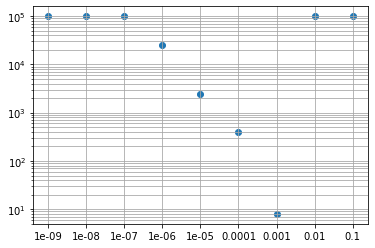

In [411]:
fig = plt.figure()
ax = plt.gca()
ax.set_yscale('log')
ax.set_xscale('log')
plt.grid(True, which="both", ls="-", color='0.65')
plt.xticks([10**(-j) for j in range(1,10)],[10**(-j) for j in range(1,10)])
plt.scatter([10**(-j) for j in range(1,10)],epochs)